# GoogleStock Prediction Using RNN

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
training_set = pd.read_csv('GoogleStockPrice_Train.csv')
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [33]:
training_set.shape

(1258, 6)

### Check for Null and Duplicate Values

In [34]:
training_set.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [35]:
training_set.duplicated().sum()

0

### Data Visualization

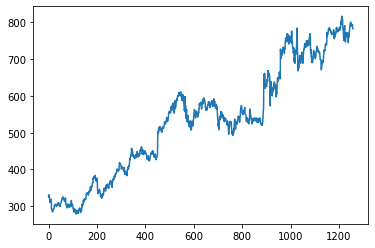

In [36]:
plt.plot(training_set['Open'])
plt.show()

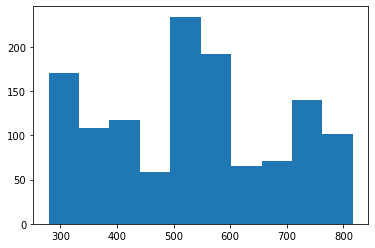

In [37]:
plt.hist(training_set['Open'])
plt.show()

### Selecting Opening Price for Time Series

In [38]:
training_set = training_set.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Standardizing the Data

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [40]:
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [41]:
X_train= training_set[0:1257]
y_train= training_set[1:1258]

X_train=np.reshape(X_train, (1257 , 1 , 1))

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [43]:
regressor = Sequential()

regressor.add(LSTM(units=50, activation='sigmoid',
                   return_sequences=True, input_shape=(None, 1)))

regressor.add(LSTM(units=50, activation='sigmoid',
                   return_sequences=True, input_shape=(None, 1)))

regressor.add(Dense(units=1))


In [44]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1989
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0796
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0773
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0733
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0711
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0634
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 13/200
40/40 [=================

### Import Test Data

In [46]:
test_set = pd.read_csv('GoogleStockPrice_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values


In [47]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Scale Down the test data

In [48]:
inputs = real_stock_price
inputs = sc.transform(inputs)

In [49]:
inputs

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [50]:
inputs = np.reshape(inputs, (20, 1, 1))

In [51]:
predicted_stock_price = regressor.predict(inputs)

In [52]:
predicted_stock_price

array([[[0.92835397]],

       [[0.9447913 ]],

       [[0.9408769 ]],

       [[0.95660007]],

       [[0.97554207]],

       [[0.9780132 ]],

       [[0.97317   ]],

       [[0.9767948 ]],

       [[0.9773704 ]],

       [[0.9766935 ]],

       [[0.97454274]],

       [[0.9733735 ]],

       [[0.9764057 ]],

       [[0.9769811 ]],

       [[1.0023085 ]],

       [[1.0145217 ]],

       [[1.0281034 ]],

       [[1.0229732 ]],

       [[0.98948723]],

       [[0.95933   ]]], dtype=float32)

In [53]:
pred_price = np.reshape(predicted_stock_price, (20, 1))


In [54]:
pred_price = sc.inverse_transform(pred_price)

In [55]:
pred_price

array([[778.16595],
       [787.002  ],
       [784.89777],
       [793.3499 ],
       [803.53235],
       [804.8608 ],
       [802.25726],
       [804.2058 ],
       [804.5152 ],
       [804.15137],
       [802.9952 ],
       [802.36664],
       [803.99664],
       [804.30597],
       [817.9209 ],
       [824.48627],
       [831.78723],
       [829.0294 ],
       [811.02875],
       [794.81744]], dtype=float32)

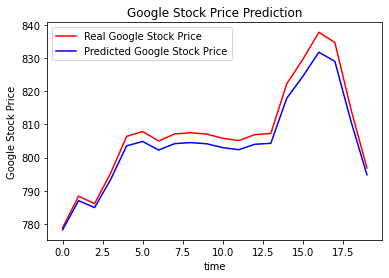

In [56]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot(pred_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()
